# Análise Exploratória de Dados usando Pandas

EDA é o processo de obter, preparar e apresentar dados com o objetivo de obter insights que direcionem o negócio de maneira eficiente e eficaz.

<img src="assets/data_prep_pipeline.png" />

É o processo mais demorado, visto que exige atenção especial para preparar dados corretamente a fim de não produzir resultados enviesados ou mesmos incorretos. 

Ao longo do processo exploratório, vamos estudar vários conceitos extremamente úteis para lidar com dados de maneira geral. Esses conceitos, que serão transformados em funções, poderão compor nossa biblioteca pessoal de análise de dados

Documentação oficial do Pandas para consulta: [link](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) 

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
data = pd.read_csv('bases/Space_Missions.csv')
print(data.columns)
print()
data.head()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')



,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


Ao olhar nosso dataset, percebemos algumas colunas que não ajudarão em nossa análise, podendo ser removidas. As demais, todas contêm informações úteis que ou podemos usá-las diretamente ou manipulá-las para que possam ser usadas no processo exploratório.

## ToDo 1

Elimine as duas primeiras colunas do Dataset. Utilize a mesma variável para armazenar o resultado da operação. 

In [71]:
# Resposta
data = data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
data.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


Os nomes das colunas precisam ser significativos para que possamos usá-las corretamente. Nesse dataset, a maioria dos nomes é de fácil compreensão, com exceção da coluna "Rocket", que representa o custo da missão (não apenas do foguete) em milhões de dólares. Assim, vamos renomear as colunas para tornar seus nomes mais compreensíveis.

## ToDo 2
Renomeie o nome das colunas conforme a lista abaixo:

> Company Name => company_name

> Location => location

> Datum => date

> Detail => detail

> Status Rocket => status_rocket

> Rocket = cost_mission

> Status Mission => status_mission

In [72]:
# Resposta
data.columns = ['company_name', 'location', 'date', 'detail', 'status_rocket', 'cost_mission', 'status_mission']
data.head()

,company_name,location,date,detail,status_rocket,cost_mission,status_mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


O método info retorna informações sobre os tipos de dados presentes no nosso dataset

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   company_name    4324 non-null   object
 1   location        4324 non-null   object
 2   date            4324 non-null   object
 3   detail          4324 non-null   object
 4   status_rocket   4324 non-null   object
 5   cost_mission    964 non-null    object
 6   status_mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


O método describe() fornece uma visão geral de como estão os dados. Entretanto, nosso dataset é composto em sua grande parte por dados categóricos. Ainda assim, o método describe() consegue apresentar informações muito relevantes. 

In [74]:
data.describe()

,company_name,location,date,detail,status_rocket,cost_mission,status_mission
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


Valores faltantes são um problemas ao realizarmos Análise Exploratória de Dados. Existem algumas abordagens que podemos utilizar para tratar desse problema:

> Remoção da linha que contenha elementos faltantes

> Sustituição do valor faltante pela média dos valores da coluna

> Substituição do valor faltante pela mediana dos valores da coluna

## ToDo 3

Julgue cada das 3 abordagens e diga qual delas você escolheria, justificando sua resposta:

In [75]:
# Resposta
# Abordagem 3. Porque, em comparação com a primeira, caso façamos a analise de outra coluna, que a coluna que seria removinha tenha dado, ainda teremos uma
# analise valida. Em comparação com a segunda, porque a mediana elimina outliers, e a média não, deixando o valor preenchido mais "justo" com o dataset.

## ToDo 4

Trate os valores faltantes de acordo com a abordagem escolhida:

In [76]:
# Resposta
# Substituição do valor faltante pela mediana dos valores da coluna
data['cost_mission'] = data['cost_mission'].str.replace(',', '').astype(float)
data['cost_mission'].fillna(data['cost_mission'].median(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company_name    4324 non-null   object 
 1   location        4324 non-null   object 
 2   date            4324 non-null   object 
 3   detail          4324 non-null   object 
 4   status_rocket   4324 non-null   object 
 5   cost_mission    4324 non-null   float64
 6   status_mission  4324 non-null   object 
dtypes: float64(1), object(6)
memory usage: 236.6+ KB


Percebemos que os valores da coluna status_rocket apresenta duas possibilidades de valores. São elas:

In [77]:
data['status_rocket'].unique()

array(['StatusActive', 'StatusRetired'], dtype=object)

## ToDo 5
Ajuste os valores dessa coluna para que eles sejam Active ou Retired, apenas. 

In [78]:
#Resposta
data['status_rocket'] = data['status_rocket'].str.replace('Status', '')
data['status_rocket'].unique()

array(['Active', 'Retired'], dtype=object)

## ToDo 6

Crie duas colunas: Year e Country. Extraia a informação do ano de lançamento da coluna Date e a informação do País que lançou o foguete da coluna Location

In [86]:
#Resposta
data['date'] = pd.to_datetime(data['date'], utc=True)
data['year'] = pd.DatetimeIndex(data['date']).year
data['country'] = data['location'].str.rsplit(',', 1).str[1]
data.head()

,company_name,location,date,detail,status_rocket,cost_mission,status_mission,year,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,Active,50.00,Success,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,Active,29.75,Success,2020,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,Active,62.00,Success,2020,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,Active,65.00,Success,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,Active,145.00,Success,2020,USA


## ToDo 7

Crie dois gráficos a partir das colunas criadas no ToDo 6:

1. um que mostre o total de lançamentos por anos

2. e o outro que mostre, de maneira descendente, o total de vezes que um pais fez o lançamento. Dica: Adiciona num pandas DataFrame o pais numa coluna e a quantidade de lançamentos em outra. Depois, ordene os valores pela quantidade de lançamentos e insira, em formato numpy array, os dados para criar um grafico.

<AxesSubplot:xlabel='year'>

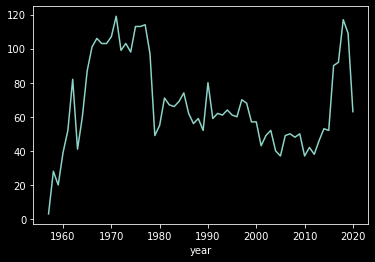

In [89]:
# grafico de total de lançamento por ano
data.groupby('year').count()['company_name'].plot()

<AxesSubplot:>

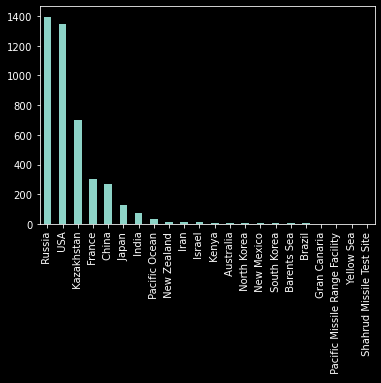

In [90]:
# grafico que mostre, de maneira descendente, o total de vezes que um pais fez o lançamento.
data['country'].value_counts().sort_values(ascending=False).plot(kind='bar')